# Лабка №5

In [33]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

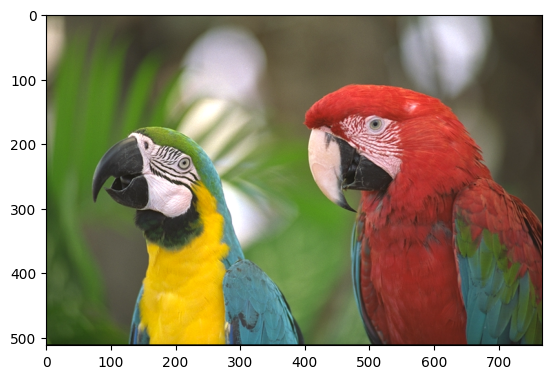

In [34]:
# Load image
img = cv2.imread('imgs/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [35]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [36]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

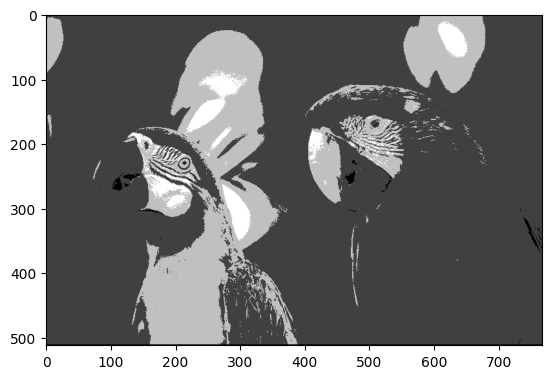

In [37]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [38]:
# Compute average quantization error
avg_quant_error = np.sqrt((img - quantized)**2).mean()
avg_quant_error

np.float64(32.75775570339627)

In [39]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x20eaadfec30>)

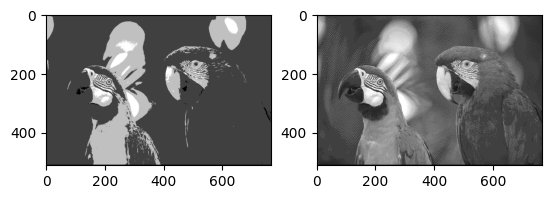

In [40]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [41]:
# Compute average quantization error for dithered image
avg_dith_error = np.sqrt((img - dithering)**2).mean()
avg_dith_error

np.float64(40.02837880452474)

## З чорно-білим

In [42]:
colors = np.array([[0, 0, 0],
                   [255, 255, 255]])

In [43]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

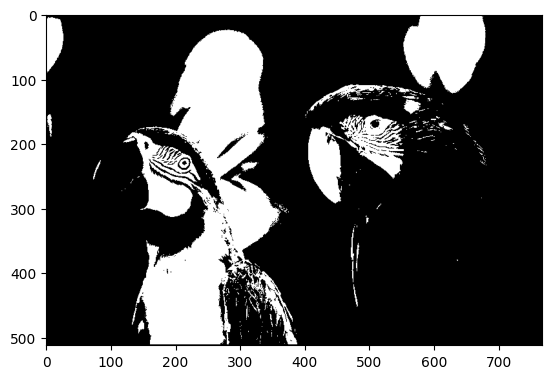

In [44]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [45]:
# Compute average quantization error
avg_quant_error = np.sqrt((img - quantized)**2).mean()
avg_quant_error

np.float64(82.05585818820529)

In [46]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x20eab9d5970>)

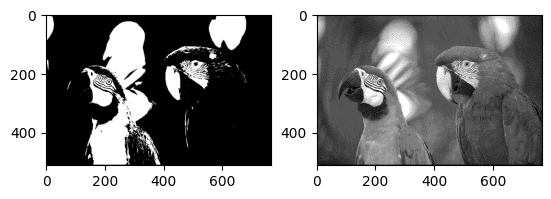

In [47]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [48]:
# Compute average quantization error for dithered image
avg_dith_error = np.sqrt((img - dithering)**2).mean()
avg_dith_error

np.float64(104.58943430582683)

## Bonus points

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_
colors

array([[117.77893362],
       [ 45.65520495],
       [203.15020005],
       [ 80.89911967],
       [145.74242216],
       [248.89051971],
       [  4.45985479],
       [183.44429943],
       [ 68.43597054],
       [ 93.4608841 ],
       [225.61200554],
       [ 57.11311676],
       [131.25672254],
       [ 33.01001505],
       [162.19204656],
       [104.99155747]])

In [50]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

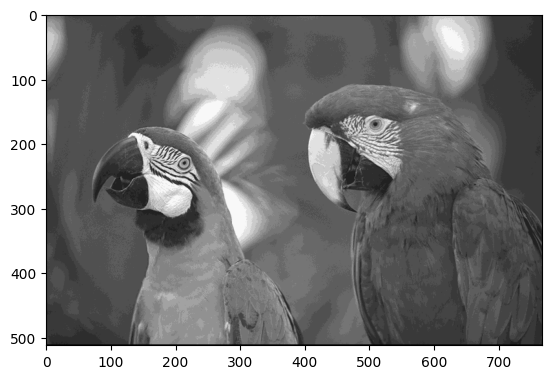

In [51]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [52]:
# Compute average quantization error
avg_quant_error = np.sqrt((img - quantized)**2).mean()
avg_quant_error

np.float64(24.459853822153356)

In [53]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x20eaa787080>)

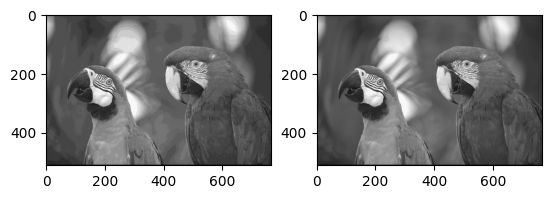

In [54]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [55]:
# Compute average quantization error for dithered image
avg_dith_error = np.sqrt((img - dithering)**2).mean()
avg_dith_error

np.float64(24.92936400733141)

## Кольорове

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_
colors

array([[111.14870016, 140.89494832,  74.05051684],
       [ 56.09750639,  53.60981458,  41.37458897],
       [172.44326137, 166.63480205, 158.64574387],
       [223.69615385,  77.1953125 ,  65.32740385],
       [ 63.16963783,  97.63792456,  95.80718709],
       [235.46370349, 187.97712888,  11.27757   ],
       [184.51585722,  60.86073514,  52.81196921],
       [212.90766315, 196.52791768, 195.31757379],
       [ 85.90519105, 123.64339854,  41.81897742],
       [144.73501719,  53.45537907,  46.2222859 ],
       [100.17610182,  96.26035513,  72.41139796],
       [109.95053732,  44.68072347,  36.45456726],
       [240.1958116 , 229.48340516, 231.85007938],
       [ 89.86556078, 141.02888504, 147.98951886],
       [137.8759787 , 138.35614365, 114.87409959],
       [ 73.39851276,  84.52465393,  49.79963391]])

In [57]:
# Cast the image to float
img = img.astype(float)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

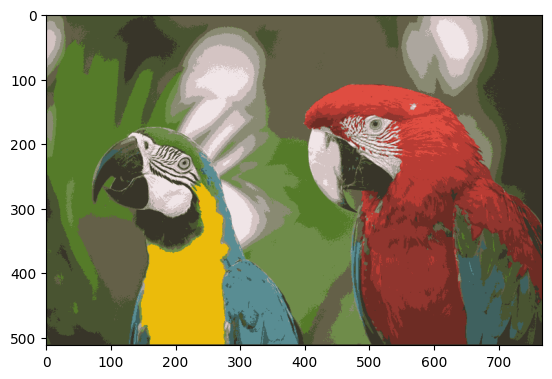

In [58]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [59]:
# Compute average quantization error
avg_quant_error = np.sqrt((img - quantized)**2).mean()
avg_quant_error

np.float64(9.153874857756982)

In [60]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diffs = colors.astype(float) - pixel
        dists = np.linalg.norm(diffs, axis=1)
        new_pixel = colors[np.argmin(dists)].astype(float)
        
        # Compute quantization error
        quant_error = (pixel - new_pixel).mean()
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r + 1][c    ] = img_tmp[r + 1][c    ] + quant_error * 7 / 16
        img_tmp[r - 1][c + 1] = img_tmp[r - 1][c + 1] + quant_error * 3 / 16
        img_tmp[r    ][c + 1] = img_tmp[r    ][c + 1] + quant_error * 5 / 16
        img_tmp[r + 1][c + 1] = img_tmp[r + 1][c + 1] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x20eaa58c590>)

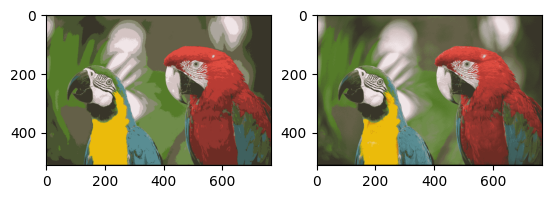

In [61]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [62]:
# Compute average quantization error for dithered image
avg_dith_error = np.sqrt((img - dithering)**2).mean()
avg_dith_error

np.float64(10.369160502067155)